In [ ]:
!pip install ta
!pip install yfinance

In [ ]:
import math
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import ta
from sklearn.preprocessing import MinMaxScaler

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

Setup of stocks and dates remains same for all the codes

In [ ]:
tickers = ["AAPL", "MSFT", "GOOG", "^NSEI"]   # correct NSE Nifty 50 ticker

start_date = "2015-01-01"
end_date = "2025-01-01"


To create Sequences of 21

In [ ]:
def create_seq(df, seq_len=21, target_col='Close'):
    values = df.values
    target = df[target_col].values  # target by name
    X, y = [], []
    for i in range(len(df) - seq_len):
        X.append(values[i:i+seq_len])
        y.append(target[i+seq_len])
    return np.array(X), np.array(y)


I have Kept the model as a seperate function, To modularize it if required we can easily replace LSTM with any other model

In [ ]:
def build_lstm(input_shape):
    model = Sequential([
        tf.keras.Input(shape=input_shape),
        LSTM(50, return_sequences=True),   # first LSTM returns sequences
        Dropout(0.2),
        LSTM(50, return_sequences=False),  # second LSTM outputs last hidden state
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

Run function which will run for all different features

/tmp/ipython-input-124740138.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.261044  24.729267  23.821668  24.718171  212818400
2015-01-05  23.577572  24.110148  23.391171  24.030261  257142000
2015-01-06  23.579790  23.839420  23.218081  23.641924  263188400
2015-01-07  23.910437  24.010294  23.677434  23.788387  160423600
2015-01-08  24.829126  24.886823  24.121244  24.238856  237458000
Datasets: Train: 1746, Val: 374, Test: 375


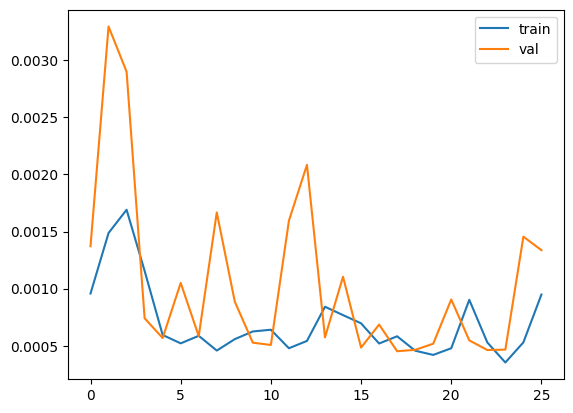

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
AAPL → RMSE: 6.6365, MAE: 5.1975, MAPE: 0.0253, R2: 0.9253


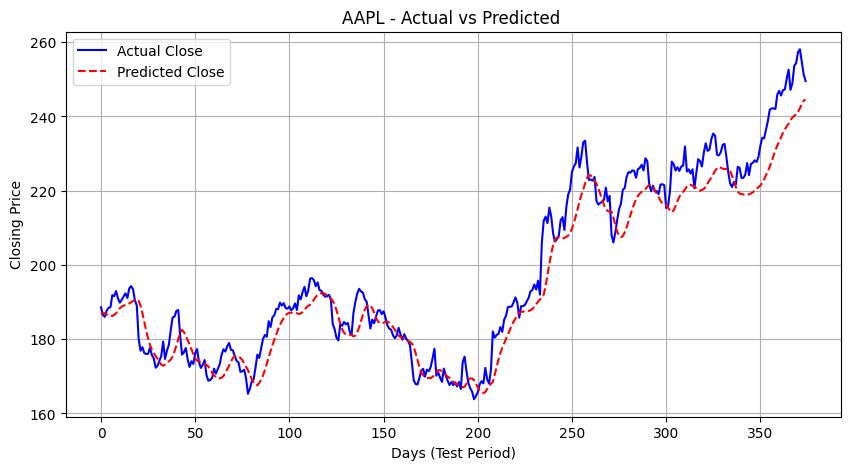

/tmp/ipython-input-124740138.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Price           Close       High        Low       Open    Volume
Ticker           MSFT       MSFT       MSFT       MSFT      MSFT
Date                                                            
2015-01-02  39.933060  40.496700  39.745182  39.847661  27913900
2015-01-05  39.565845  39.907444  39.497524  39.600003  39673900
2015-01-06  38.985111  39.924510  38.891171  39.608531  36447900
2015-01-07  39.480446  39.676866  38.848487  39.266946  29114100
2015-01-08  40.641861  40.778501  39.898882  39.924501  29645200
Datasets: Train: 1746, Val: 374, Test: 375


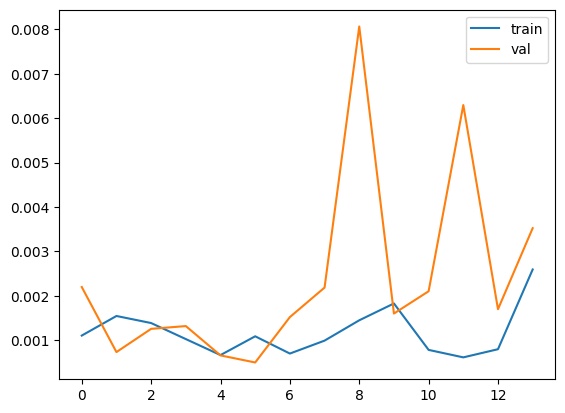

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
MSFT → RMSE: 14.4911, MAE: 12.1089, MAPE: 0.0303, R2: 0.8776


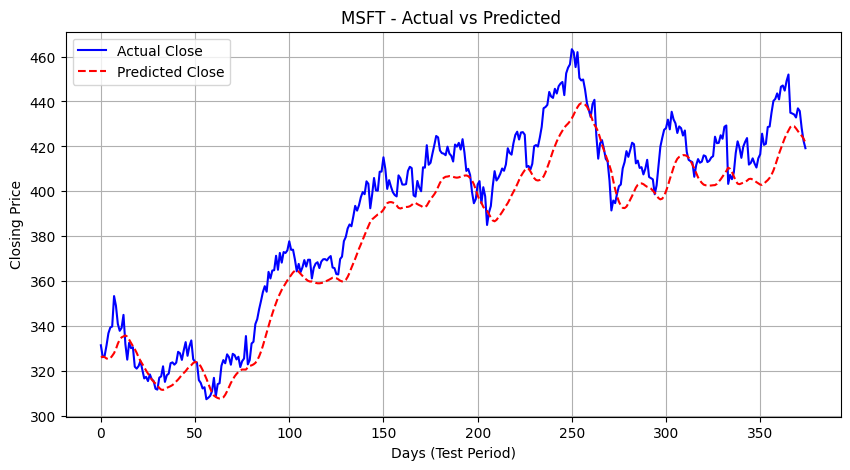

/tmp/ipython-input-124740138.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Price           Close       High        Low       Open    Volume
Ticker           GOOG       GOOG       GOOG       GOOG      GOOG
Date                                                            
2015-01-02  26.014021  26.334234  25.978828  26.222208  28951268
2015-01-05  25.471743  25.990229  25.431593  25.937190  41196796
2015-01-06  24.881384  25.586001  24.836278  25.527757  57998800
2015-01-07  24.838755  25.143303  24.766880  25.131208  41301082
2015-01-08  24.917072  24.956727  24.338112  24.684596  67071641
Datasets: Train: 1746, Val: 374, Test: 375


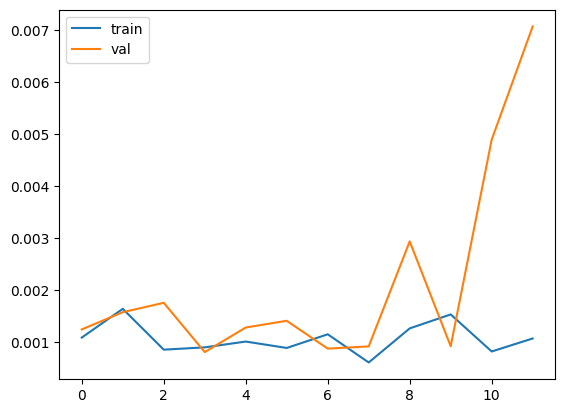

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
GOOG → RMSE: 5.6246, MAE: 4.3379, MAPE: 0.0276, R2: 0.9209


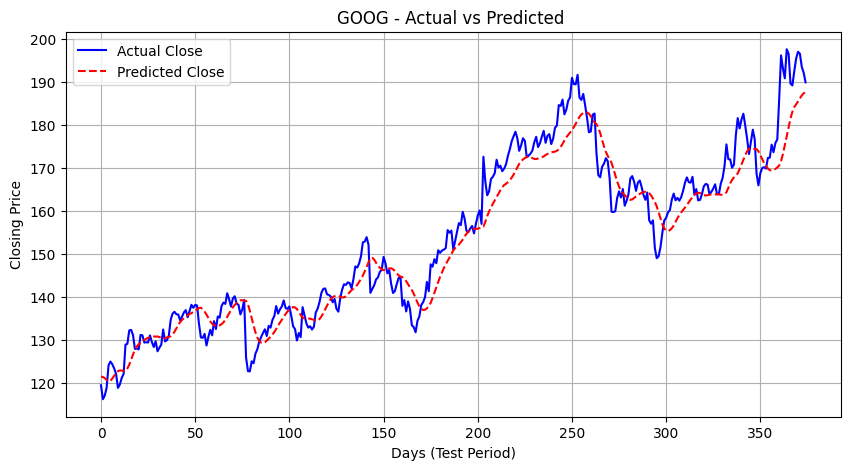

/tmp/ipython-input-124740138.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Price             Close         High          Low         Open  Volume
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI   ^NSEI
Date                                                                  
2015-01-02  8395.450195  8410.599609  8288.700195  8288.700195  101900
2015-01-05  8378.400391  8445.599609  8363.900391  8407.950195  118200
2015-01-06  8127.350098  8327.849609  8111.350098  8325.299805  172800
2015-01-07  8102.100098  8151.200195  8065.450195  8118.649902  164100
2015-01-08  8234.599609  8243.500000  8167.299805  8191.399902  143800
Datasets: Train: 1706, Val: 366, Test: 366


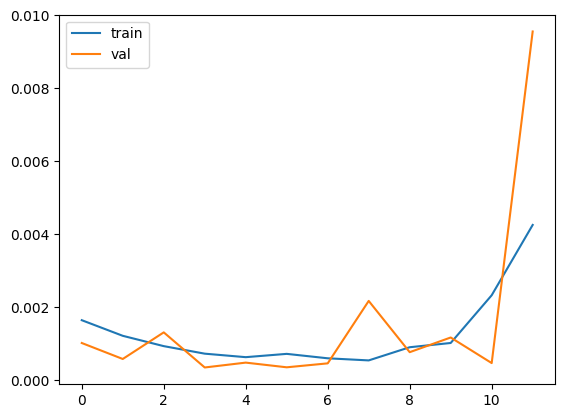

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
^NSEI → RMSE: 560.1799, MAE: 449.0828, MAPE: 0.0194, R2: 0.9250


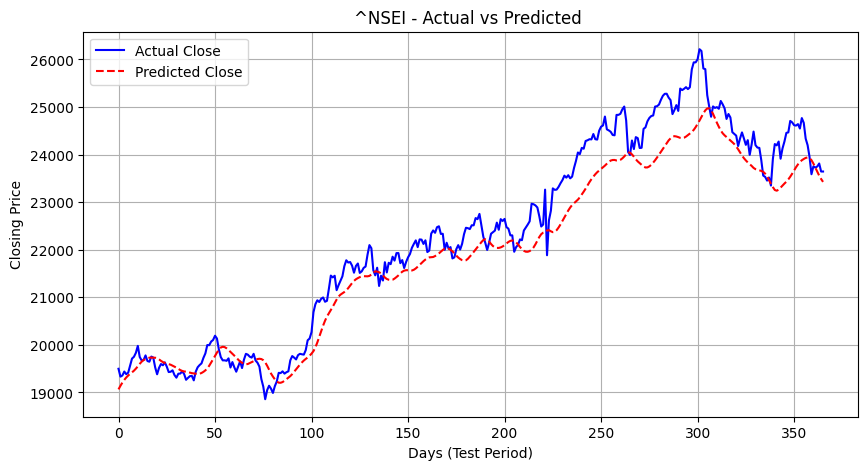

In [ ]:
    for ticker in tickers:
      df = yf.download(ticker, start=start_date, end=end_date, progress=False)
      print(df.head())
      df = df[['Open', 'High', 'Low', 'Close']].round(2).dropna()
      scaler_X = MinMaxScaler()
      scaled_features = scaler_X.fit_transform(df)
      scaler_y = MinMaxScaler()
      scaled_close = scaler_y.fit_transform(df[['Close']])
      df_scaled = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

      X, y = create_seq(df_scaled)
      # After creating X, y
      n = len(X)
      train_end = int(n * 0.7)    # First 70% = training
      val_end   = int(n * 0.85)   # Next 15% = validation
                                  # Last 15% = test
      #chornological splitting of the data
      X_train, y_train = X[:train_end], y[:train_end]
      X_val, y_val     = X[train_end:val_end], y[train_end:val_end]
      X_test, y_test   = X[val_end:], y[val_end:]
      print(f"Datasets: Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")
      model = build_lstm((21, X.shape[2]))
      early_stop = EarlyStopping(
          monitor='val_loss',
          patience=8,
          mode='min',
          restore_best_weights=True
      )

      history = model.fit(
          X_train, y_train,
          validation_data=(X_val, y_val),
          epochs= 50,
          batch_size= 32,
          shuffle=False,
          callbacks=[early_stop],
          verbose=0
      )
      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.legend(['train','val'])
      plt.show()

      pred_scaled = model.predict(X_test).ravel()
      pred = scaler_y.inverse_transform(pred_scaled.reshape(-1,1)).ravel()
      y_test= scaler_y.inverse_transform(y_test.reshape(-1,1)).ravel()
      rmse = math.sqrt(mean_squared_error(y_test, pred))
      mae = mean_absolute_error(y_test, pred)
      mape = mean_absolute_percentage_error(y_test, pred)
      r2 = r2_score(y_test, pred)
      print(f"{ticker} → RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4f}, R2: {r2:.4f}")

      plt.figure(figsize=(10,5))
      plt.plot(y_test, label="Actual Close", color='blue')
      plt.plot(pred, label="Predicted Close", color='red', linestyle='--')
      plt.title(f"{ticker} - Actual vs Predicted ")
      plt.xlabel("Days (Test Period)")
      plt.ylabel("Closing Price")
      plt.legend()
      plt.grid(True)
      plt.show()